In [1]:
'''Name: apeksha chavan UID: 2017130013 Course: OE5(FCI) BE COMPS

Experiment 3: - Fuzzy Logic

Theory:
Fuzzy Logic (FL) is a method of reasoning that resembles human reasoning. The approach of FL imitates the way of decision
making in humans that involves all intermediate possibilities between digital values YES and NO.
Fuzzy logic is intended to model logical reasoning with vague or imprecise statements like “Petr is young (rich, tall, hungry, etc.)”. It refers to
a family of many-valued logics (see entry on many-valued logic) and thus stipulates that the truth value (which, in this case amounts to a
degree of truth) of a logically compound proposition, like “Carles is tall and Chris is rich”, is determined by the truth value of its components.
In other words, like in classical logic, one imposes truth-functionality.
Procedure: - Installation of skfuzzy library is required for this experiment. First set the antecedents and consequents, then define the
boundaries of the ordinal values. Then rules are defined, which can be used to create a fuzzy model. This process is called fuzzification of
data. Input values can be fuzzified to generate output which is defuzzified. '''

'Name: apeksha chavan UID: 2017130013 Course: OE5(FCI) BE COMPS\n\nExperiment 3: - Fuzzy Logic\n\nTheory:\nFuzzy Logic (FL) is a method of reasoning that resembles human reasoning. The approach of FL imitates the way of decision\nmaking in humans that involves all intermediate possibilities between digital values YES and NO.\nFuzzy logic is intended to model logical reasoning with vague or imprecise statements like “Petr is young (rich, tall, hungry, etc.)”. It refers to\na family of many-valued logics (see entry on many-valued logic) and thus stipulates that the truth value (which, in this case amounts to a\ndegree of truth) of a logically compound proposition, like “Carles is tall and Chris is rich”, is determined by the truth value of its components.\nIn other words, like in classical logic, one imposes truth-functionality.\nProcedure: - Installation of skfuzzy library is required for this experiment. First set the antecedents and consequents, then define the\nboundaries of the ordi

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# New Antecedent/Consequent objects hold universe variables and membership functions
laundry = ctrl.Antecedent(np.arange(0, 11, 1), 'laundry')
dirt = ctrl.Antecedent(np.arange(0, 11, 1), 'dirt')
powder = ctrl.Consequent(np.arange(0, 26, 1), 'powder')



In [4]:
# Auto-membership function population is possible with .automf(3, 5, or 7)
laundry.automf(3)
dirt.automf(3)

In [5]:
powder['low'] = fuzz.trimf(powder.universe, [0, 0, 13])
powder['medium'] = fuzz.trimf(powder.universe, [0, 13, 25])
powder['high'] = fuzz.trimf(powder.universe, [13, 25, 25])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


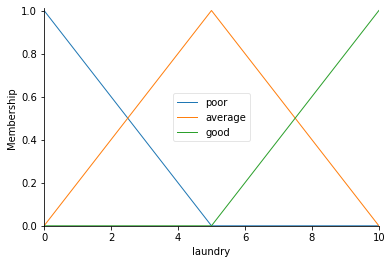

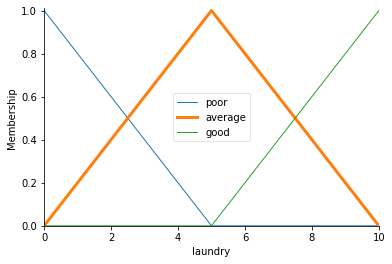

In [6]:
laundry.view()
laundry['average'].view()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


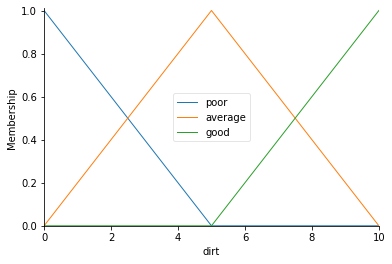

In [7]:
dirt.view()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


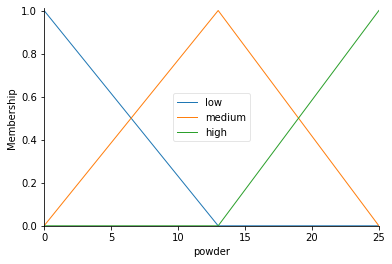

In [8]:
powder.view()

In [9]:
# It creates a connection of antecedent(s) to consequent(s)
rule1 = ctrl.Rule(laundry['poor'] | dirt['poor'], powder['low'])
rule2 = ctrl.Rule(laundry['poor'] | dirt['average'], powder['medium'])
rule3 = ctrl.Rule(laundry['poor'] | dirt['good'], powder['medium'])
rule4 = ctrl.Rule(laundry['average'] | dirt['poor'], powder['medium'])
rule5 = ctrl.Rule(laundry['average'] | dirt['average'], powder['medium'])
rule6 = ctrl.Rule(laundry['average'] | dirt['good'], powder['high'])
rule7 = ctrl.Rule(laundry['good'] | dirt['poor'], powder['medium'])
rule8 = ctrl.Rule(laundry['good'] | dirt['average'], powder['high'])
rule9 = ctrl.Rule(laundry['good'] | dirt['good'], powder['high'])

In [10]:
# Is a base class to contain a Fuzzy Control System.
powder_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

14.662525597269628


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


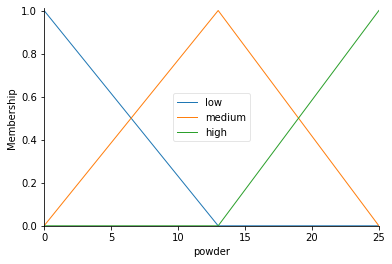

In [11]:
# Calculate results from a ControlSystem.
powder_reqd = ctrl.ControlSystemSimulation(powder_ctrl)
powder_reqd.input['laundry'] = 6.5
powder_reqd.input['dirt'] = 9.8
powder_reqd.compute()
powder['low'] = fuzz.trimf(powder.universe, [0, 0, 13])
powder['medium'] = fuzz.trimf(powder.universe, [0, 13, 25])
powder['high'] = fuzz.trimf(powder.universe, [13, 25, 25])
print(powder_reqd.output['powder'])
powder.view(sim=powder_reqd)

In [12]:
'''Conclusion:
 I learnt about Fuzzy Logic, Fuzzy Controller and Defuzzification and successfully implemented it by
 creating a fuzzy control system which models amount of washing powder needed according to the laundry and dirt mentioned. 
 The output is the set of washing parameters, namely the amount of powder in grams being used for washing, 
 here we found 14.66 grams of washing powder is needed for given parameters of laundry and dirt'''
 

'Conclusion:\n I learnt about Fuzzy Logic, Fuzzy Controller and Defuzzification and successfully implemented it by\n creating a fuzzy control system which models amount of washing powder needed according to the laundry and dirt mentioned. \n The output is the set of washing parameters, namely the amount of powder in grams being used for washing, \n here we found 14.66 grams of washing powder is needed for given parameters of laundry and dirt'